In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns

plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
conn = mysql.connector.connect(
    host = "eda-database.c3oek28e8yta.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "whskdhs",
    password = "whskdhs1234",
    database = "workspace"
)

cursor = conn.cursor(buffered=True)

In [3]:
sql_interest_rate = """
    SELECT *
    FROM interest_rate
    WHERE date in (SELECT date FROM housing_price_index)
    """

sql_gdp = """
    SELECT *
    FROM gdp
"""

sql_price_index = """
    SELECT *
    FROM price_index
    WHERE date in (SELECT date FROM interest_rate)
    """

sql_jeonse_price_index = """
    SELECT *
    FROM jeonse_price_index
    WHERE date in (SELECT date FROM interest_rate)
    """

sql_housing_price_index = """
    SELECT *
    FROM housing_price_index
    WHERE date in (SELECT date FROM interest_rate)
    """

sql_loan_interest_rate = """
    SELECT *
    FROM loan_interest_rate
    WHERE date in (SELECT date FROM interest_rate)
    """

In [4]:
# 금리 데이터 프레임
df_interest_rate = pd.read_sql(sql_interest_rate, conn)
print(df_interest_rate)

# GDP 데이터 프레임
df_gdp = pd.read_sql(sql_gdp, conn)
print(df_gdp)

# 물가지수 데이터
df_price_index = pd.read_sql(sql_price_index, conn)
print(df_price_index)

# 대출금리 데이터 프레임
df_jeonse_price_index = pd.read_sql(sql_jeonse_price_index, conn)
print(df_jeonse_price_index)

# 대출금리 데이터 프레임
df_loan = pd.read_sql(sql_loan_interest_rate, conn)
print(df_loan)

# 매매가격지수 데이터 프레임
df_housing_price_index = pd.read_sql(sql_housing_price_index, conn)
print(df_housing_price_index)

conn.close()

           date  k_interest_rate  usa_interest_rate
0    2004-09-01             3.50               1.50
1    2004-10-01             3.50               1.75
2    2004-11-01             3.50               1.75
3    2004-12-01             3.25               2.00
4    2005-01-01             3.25               2.25
..          ...              ...                ...
235  2024-04-01             3.50               5.50
236  2024-05-01             3.50               5.50
237  2024-06-01             3.50               5.50
238  2024-07-01             3.50               5.50
239  2024-08-01             3.50               5.50

[240 rows x 3 columns]
          date  k_gdp  usa_gdp
0   2004-03-01    1.4      2.3
1   2004-06-01    0.8      3.1
2   2004-09-01    0.3      3.8
3   2004-12-01    0.8      4.1
4   2005-03-01    0.9      4.5
..         ...    ...      ...
77  2023-06-01    0.6      2.4
78  2023-09-01    0.8      4.4
79  2023-12-01    0.5      3.2
80  2024-03-01    1.3      1.6
81  2024-06

/tmp/ipykernel_6022/112676034.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_interest_rate = pd.read_sql(sql_interest_rate, conn)
/tmp/ipykernel_6022/112676034.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gdp = pd.read_sql(sql_gdp, conn)
/tmp/ipykernel_6022/112676034.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_price_index = pd.read_sql(sql_price_index, conn)
/tmp/ipykernel_6022/112676034.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI o

1. 금리와 가계대출금리

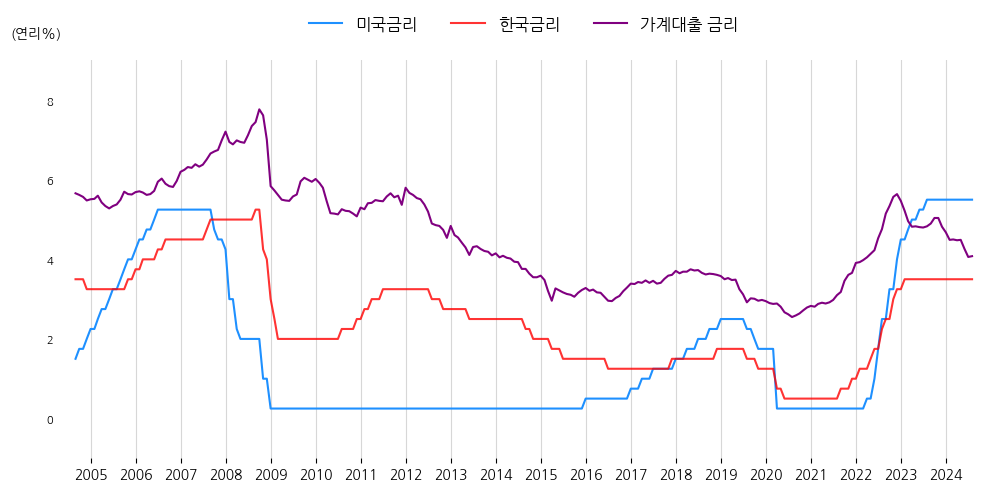

In [34]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
x = df_interest_rate['date']

# 타이틀, 레이블 설정
ax1.set_ylabel('(연리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax1.plot(x, df_loan['household_loan'],
         color='purple', label='가계대출 금리', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)


# 축 범위 설정
ax1.set_ylim([-1, 9])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3, frameon=False, fontsize=12)

# 그리드 설정
plt.grid(True, axis='x', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

plt.tight_layout()

plt.savefig('../data/pic/loan.png', dpi=200)

plt.show()


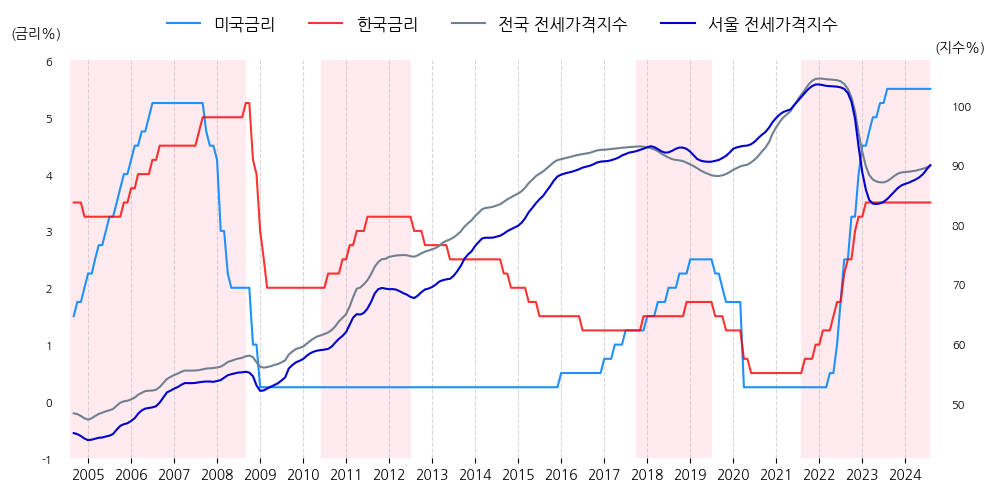

In [11]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax2 = ax1.twinx()
x = df_interest_rate['date']

# 타이틀, 레이블 설정
# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수%)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_jeonse_price_index['national_jeonse_price_index'],
         color='slategrey', label='전국 전세가격지수', alpha=1.0)

ax2.plot(x, df_jeonse_price_index['seoul_jeonse_price_index'],
         color='mediumblue', label='서울 전세가격지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2004-08-01', '2008-09-01', facecolor='pink', alpha=0.3) 
ax1.axvspan('2010-06-01','2012-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2017-10-01', '2019-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2021-08-01', '2024-08-01', facecolor='pink', alpha=0.3)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/jeonse.png', dpi=200)
plt.show()


In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

x = df_interest_rate['date']

# 타이틀, 레이블 설정
# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수%)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_jeonse_price_index['national_jeonse_price_index'],
         color='slategrey', label='전국 전세가격지수', alpha=1.0)

ax2.plot(x, df_jeonse_price_index['seoul_jeonse_price_index'],
         color='mediumblue', label='서울 전세가격지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2004-08-01', '2008-09-01', facecolor='pink', alpha=0.3) 
ax1.axvspan('2010-06-01','2012-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2017-10-01', '2019-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2021-08-01', '2024-08-01', facecolor='pink', alpha=0.3)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/jeonse.png', dpi=200)
plt.show()


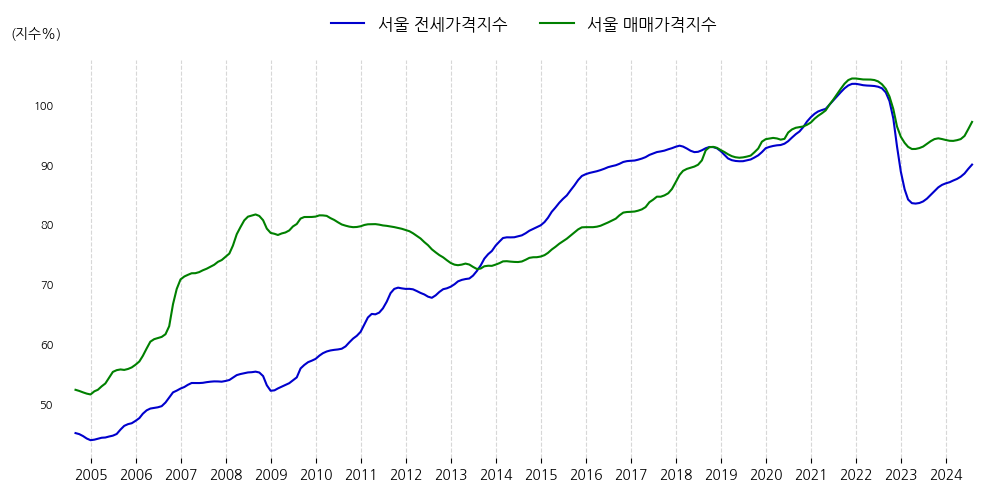

In [23]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

x = df_interest_rate['date']

# 타이틀, 레이블 설정
# 축 레이블 설정
ax1.set_ylabel('(지수%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)

# 데이터 플로팅
"""ax1.plot(x, df_jeonse_price_index['national_jeonse_price_index'],
         color='slategrey', label='전국 전세가격지수', alpha=1.0)"""

ax1.plot(x, df_jeonse_price_index['seoul_jeonse_price_index'],
         color='mediumblue', label='서울 전세가격지수', alpha=1.0)


"""ax1.plot(x, df_housing_price_index['national_housing_price_index'],
         color='orange', label='전국 매매가격지수', alpha=1.0)"""

ax1.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax1.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

"""# 부분 배경색 설정
ax1.axvspan('2004-08-01', '2008-09-01', facecolor='pink', alpha=0.3) 
ax1.axvspan('2010-06-01','2012-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2017-10-01', '2019-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2021-08-01', '2024-08-01', facecolor='pink', alpha=0.3)
"""
# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/jeonse_housing.png', dpi=200)
plt.show()


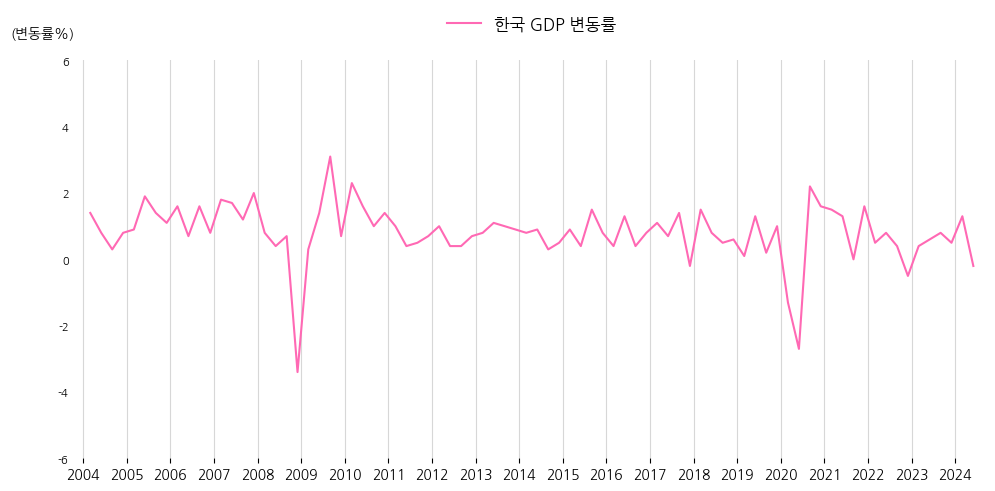

In [49]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
x = df_gdp['date']

# 타이틀, 레이블 설정
ax1.set_ylabel('(변동률%)', rotation=0)
ax1.yaxis.set_label_coords(-0.04, 1.05)

# 데이터 플로팅
ax1.plot(x, df_gdp['k_gdp'], 
         color='hotpink', label='한국 GDP 변동률', alpha=1.0)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)


# 축 범위 설정
ax1.set_ylim([-6, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3, frameon=False, fontsize=12)

# 그리드 설정
plt.grid(True, axis='x', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

plt.tight_layout()

plt.savefig('../data/pic/gdp.png', dpi=200)

plt.show()


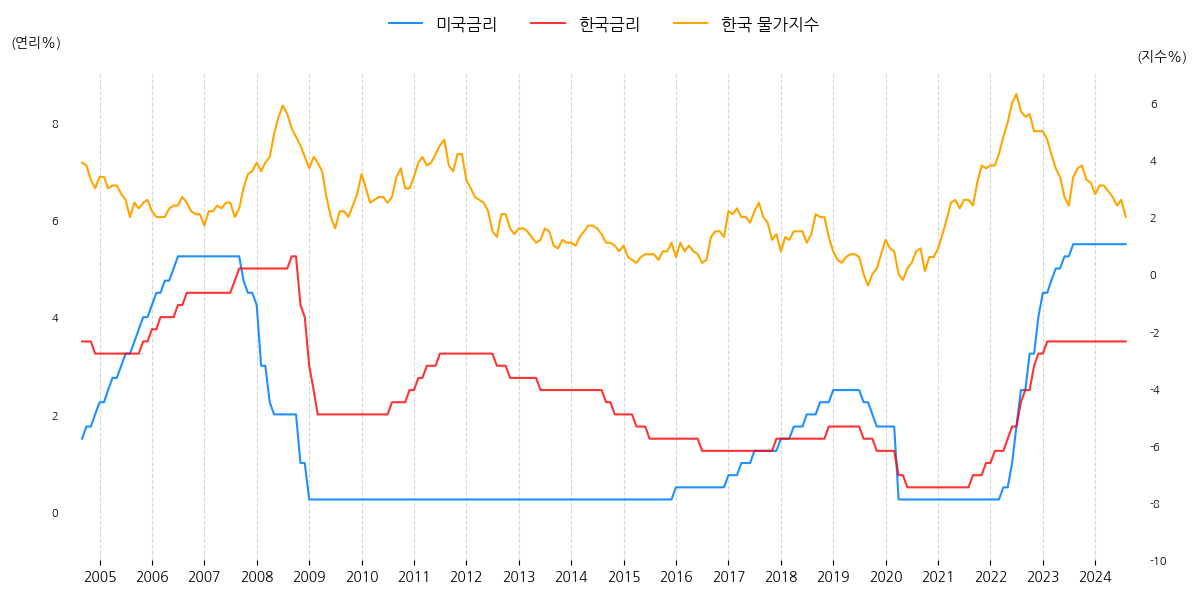

In [69]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']

# 축 레이블 설정
ax1.set_ylabel('(연리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수%)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_price_index['k_price_index'], 
         color='orange', label='한국 물가지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 9])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-10, 7])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/price_index.png', dpi=200)
plt.show()


---

1. 금리와 주택매매가격지수

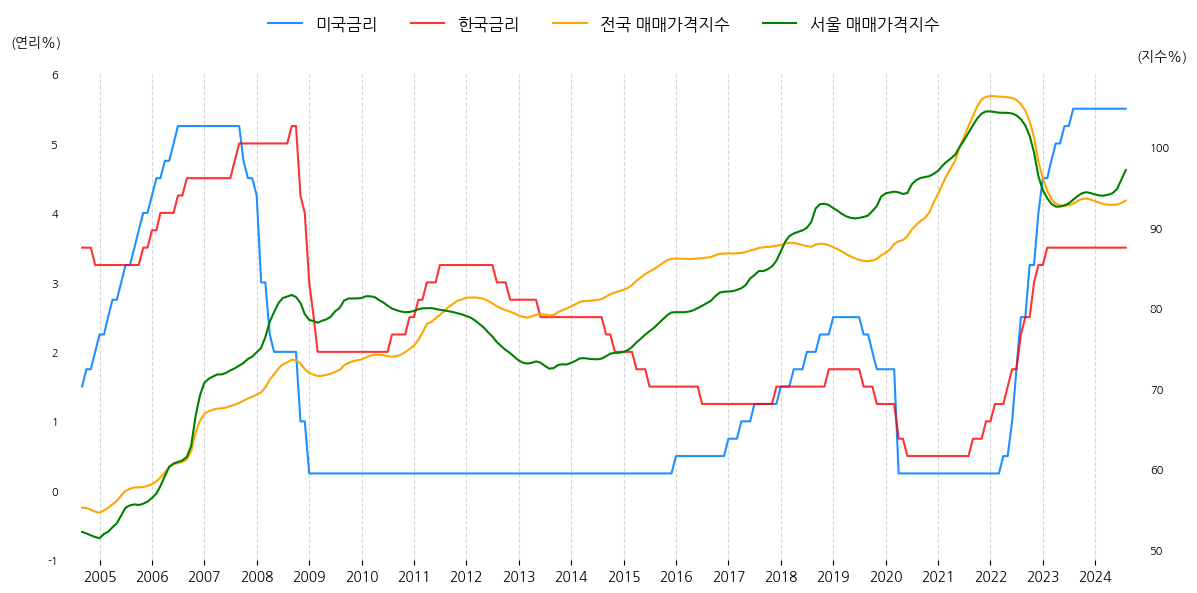

In [56]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(연리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수%)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_housing_price_index['national_housing_price_index'],
         color='orange', label='전국 매매가격지수', alpha=1.0)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/housing_price_index.png', dpi=200)
plt.show()


---

2. 매매가격지수 증감률

2-1.서울 매매가격지수 증감률

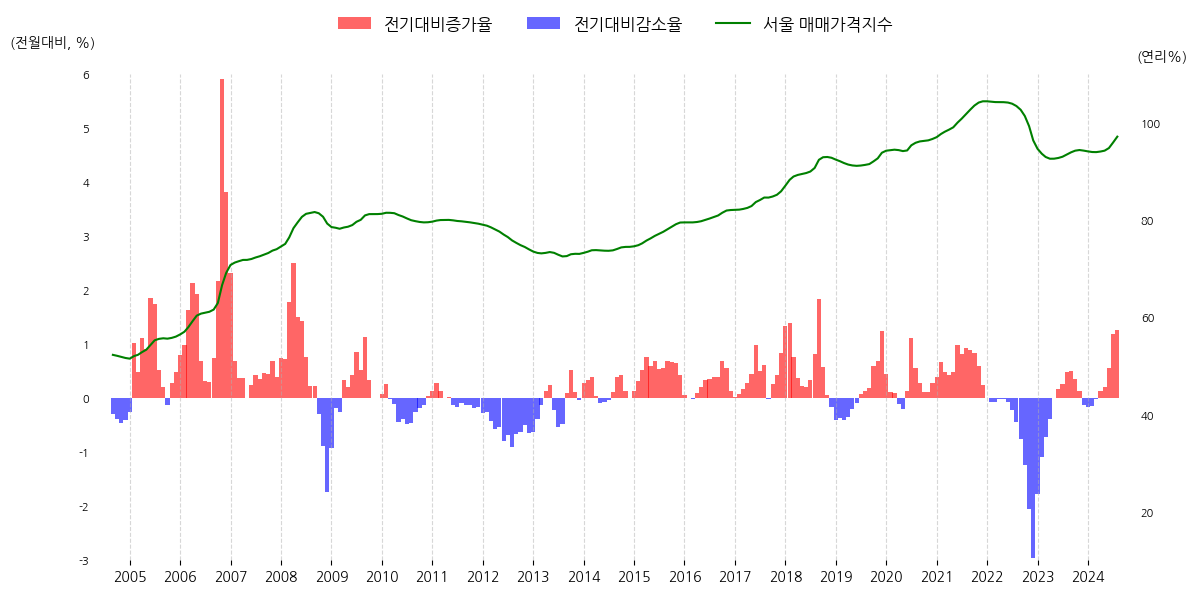

In [23]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(전월대비, %)', rotation=0)
ax1.yaxis.set_label_coords(-0.045, 1.05)
ax2.set_ylabel('(연리%)', rotation=0)
ax2.yaxis.set_label_coords(1.03, 1.05)

# 데이터 플로팅
seoul_rate_of_change_plus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] >= 0]

seoul_rate_of_change_minus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] < 0]

ax1.bar(seoul_rate_of_change_plus['date'], seoul_rate_of_change_plus['seoul_rate_of_change'],
        width=30.4,
        color='r', label='전기대비증가율', alpha=0.6)

ax1.bar(seoul_rate_of_change_minus['date'], seoul_rate_of_change_minus['seoul_rate_of_change'],
        width=30.4,
        color='b', label='전기대비감소율', alpha=0.6)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'], 
         color='g', label='서울 매매가격지수')

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-3, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([10, 110])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=3, frameon=False, fontsize=12)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_rate_of_chage.png', dpi=200)
plt.show()


In [16]:
# 축 범위 설정을 위해 min, max 값 확인

print(df_housing_price_index['seoul_housing_price_index'].describe())
print("======================================================")
print(df_housing_price_index['seoul_rate_of_change'].describe())

count    240.000000
mean      81.286625
std       12.739894
min       51.460000
25%       73.962500
50%       79.945000
75%       92.572500
max      104.380000
Name: seoul_housing_price_index, dtype: float64
count    240.000000
mean       0.260667
std        0.801689
min       -2.960000
25%       -0.120000
50%        0.210000
75%        0.542500
max        5.900000
Name: seoul_rate_of_change, dtype: float64


2-3. 금리 변동폭 대비 주택매매가격지수 변동률

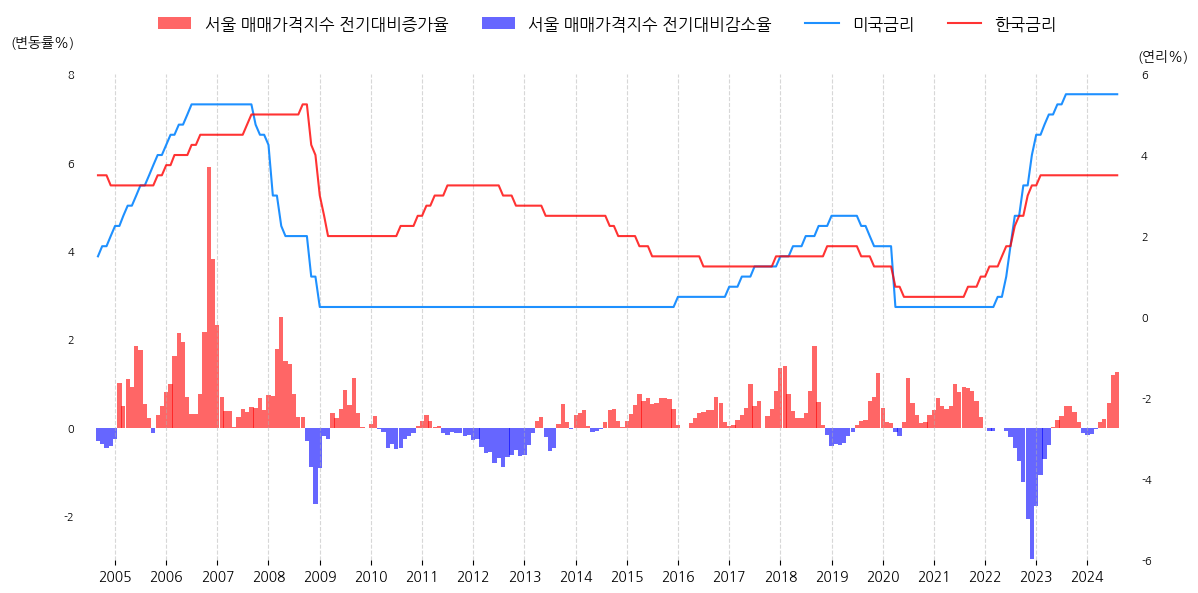

In [48]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(변동률%)', rotation=0)
ax1.yaxis.set_label_coords(-0.04, 1.05)
ax2.set_ylabel('(금리%)', rotation=0)
ax2.yaxis.set_label_coords(1.03, 1.05)

# 데이터 플로팅
seoul_rate_of_change_plus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] >= 0]

seoul_rate_of_change_minus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] < 0]

ax1.bar(seoul_rate_of_change_plus['date'], seoul_rate_of_change_plus['seoul_rate_of_change'],
        width=30.4,
        color='r', label='서울 매매가격지수 전기대비증가율', alpha=0.6)

ax1.bar(seoul_rate_of_change_minus['date'], seoul_rate_of_change_minus['seoul_rate_of_change'],
        width=30.4,
        color='b', label='서울 매매가격지수 전기대비감소율', alpha=0.6)

ax2.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax2.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-3, 8])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-6, 6])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_rate_of_chage.png', dpi=200)
plt.show()


---

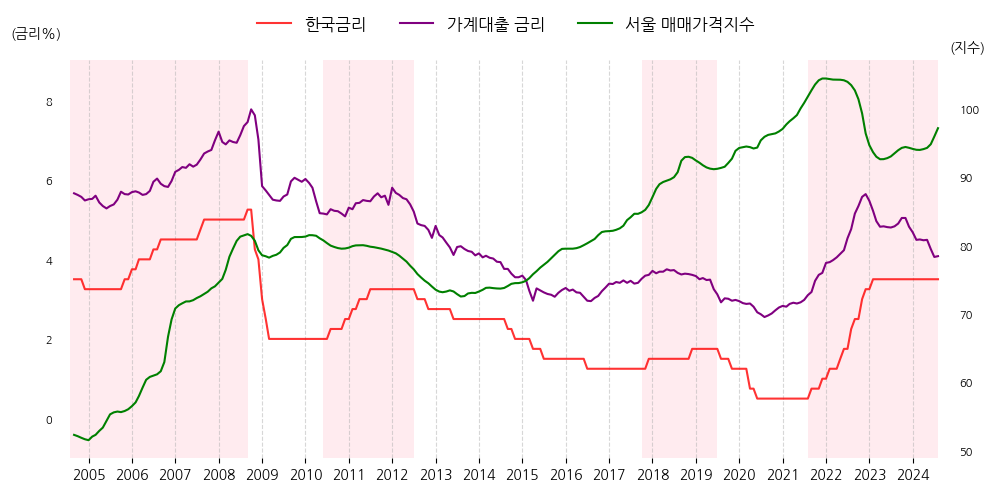

In [136]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax2 = ax1.twinx()
x = df_interest_rate['date']

# 타이틀, 레이블 설정
# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax1.plot(x, df_loan['household_loan'],
         color='purple', label='가계대출 금리', alpha=1.0)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 9])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2004-08-01', '2008-09-01', facecolor='pink', alpha=0.3) 
ax1.axvspan('2010-06-01','2012-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2017-10-01', '2019-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2021-08-01', '2024-08-01', facecolor='pink', alpha=0.3)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/loan_bg.png', dpi=200)
plt.show()


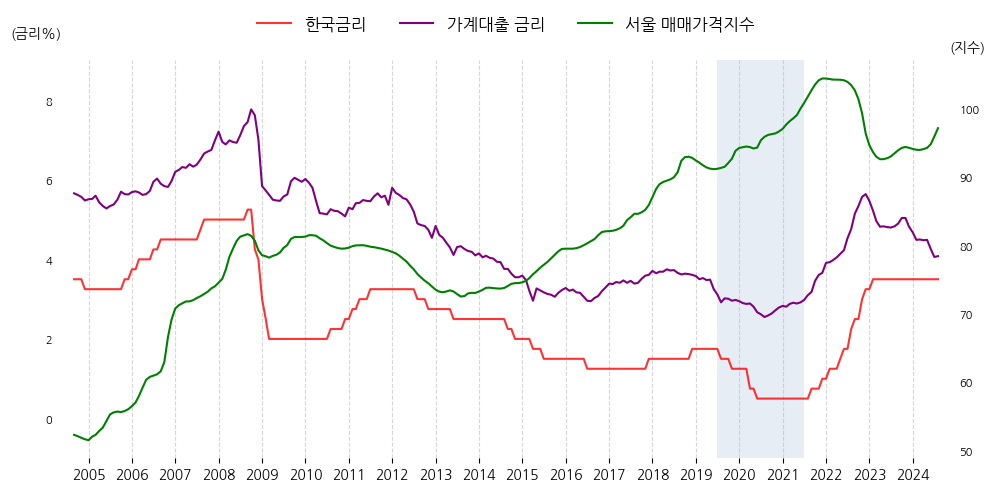

In [137]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax2 = ax1.twinx()
x = df_interest_rate['date']

# 타이틀, 레이블 설정
# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax1.plot(x, df_loan['household_loan'],
         color='purple', label='가계대출 금리', alpha=1.0)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 9])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2019-07-01', '2021-07-01', facecolor='lightsteelblue', alpha=0.3)    # 3기

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/loan_bg_3.png', dpi=200)
plt.show()


---

3-1. 금리 인하 기간 주택매매가격지수 변동률

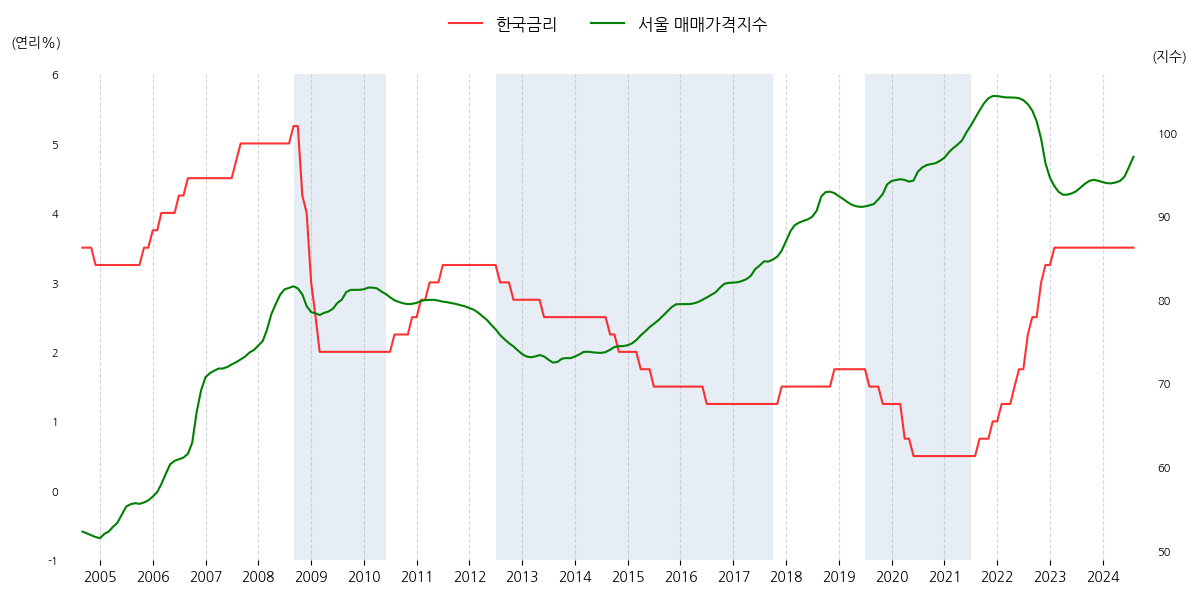

In [74]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(연리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
"""ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)"""

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2008-09-01', '2010-06-01', facecolor='lightsteelblue', alpha=0.3)    # 1기
ax1.axvspan('2012-07-01', '2017-10-01', facecolor='lightsteelblue', alpha=0.3)    # 2기
ax1.axvspan('2019-07-01', '2021-07-01', facecolor='lightsteelblue', alpha=0.3)    # 3기

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_housing_price_bg.png', dpi=200)
plt.show()


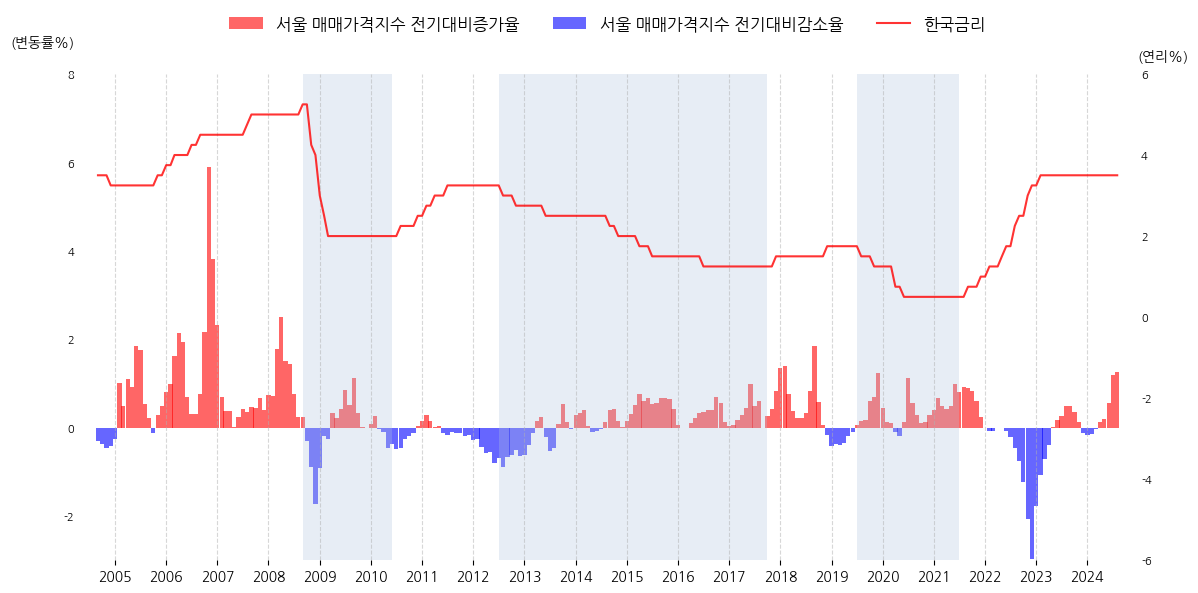

In [115]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(변동률%)', rotation=0)
ax1.yaxis.set_label_coords(-0.04, 1.05)
ax2.set_ylabel('(연리%)', rotation=0)
ax2.yaxis.set_label_coords(1.03, 1.05)

# 데이터 플로팅
seoul_rate_of_change_plus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] >= 0]

seoul_rate_of_change_minus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] < 0]

ax1.bar(seoul_rate_of_change_plus['date'], seoul_rate_of_change_plus['seoul_rate_of_change'],
        width=30.4,
        color='r', label='서울 매매가격지수 전기대비증가율', alpha=0.6)

ax1.bar(seoul_rate_of_change_minus['date'], seoul_rate_of_change_minus['seoul_rate_of_change'],
        width=30.4,
        color='b', label='서울 매매가격지수 전기대비감소율', alpha=0.6)

ax2.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-3, 8])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-6, 6])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2008-09-01', '2010-06-01', facecolor='lightsteelblue', alpha=0.3)    # 1기
ax1.axvspan('2012-07-01', '2017-10-01', facecolor='lightsteelblue', alpha=0.3)    # 2기
ax1.axvspan('2019-07-01', '2021-07-01', facecolor='lightsteelblue', alpha=0.3)    # 3기

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_rate_of_chage(kor)_bg.png', dpi=200)
plt.show()


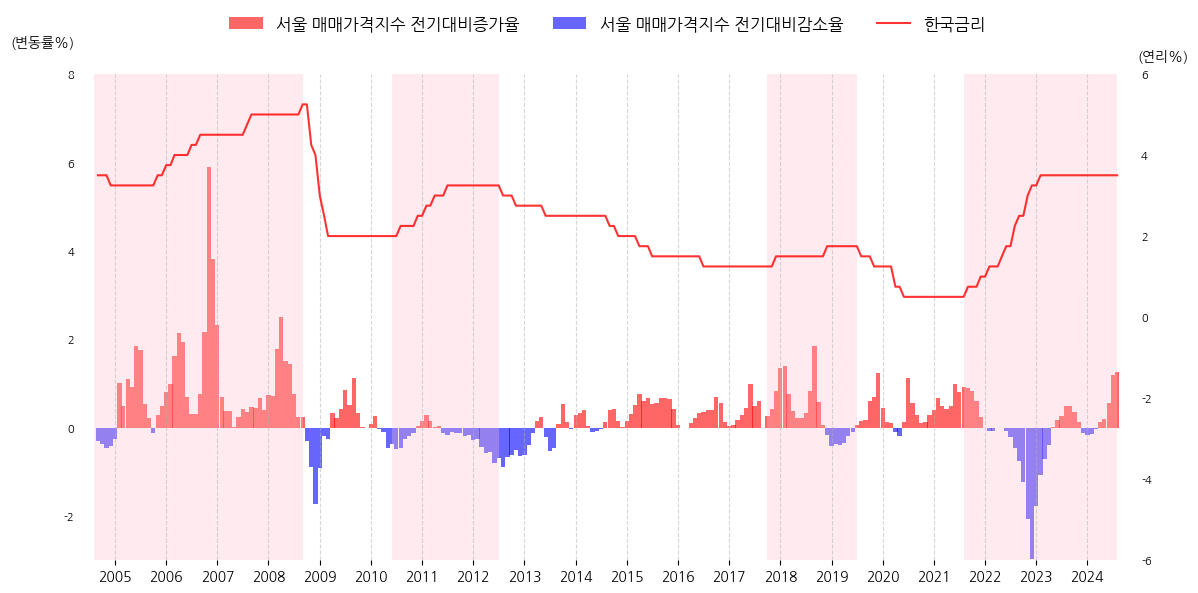

In [114]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(변동률%)', rotation=0)
ax1.yaxis.set_label_coords(-0.04, 1.05)
ax2.set_ylabel('(연리%)', rotation=0)
ax2.yaxis.set_label_coords(1.03, 1.05)

# 데이터 플로팅
seoul_rate_of_change_plus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] >= 0]

seoul_rate_of_change_minus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] < 0]

ax1.bar(seoul_rate_of_change_plus['date'], seoul_rate_of_change_plus['seoul_rate_of_change'],
        width=30.4,
        color='r', label='서울 매매가격지수 전기대비증가율', alpha=0.6)

ax1.bar(seoul_rate_of_change_minus['date'], seoul_rate_of_change_minus['seoul_rate_of_change'],
        width=30.4,
        color='b', label='서울 매매가격지수 전기대비감소율', alpha=0.6)

ax2.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-3, 8])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-6, 6])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2004-08-01', '2008-09-01', facecolor='pink', alpha=0.3) 
ax1.axvspan('2010-06-01','2012-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2017-10-01', '2019-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2021-08-01', '2024-08-01', facecolor='pink', alpha=0.3)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_rate_of_chage(kor)_bg1.png', dpi=200)
plt.show()


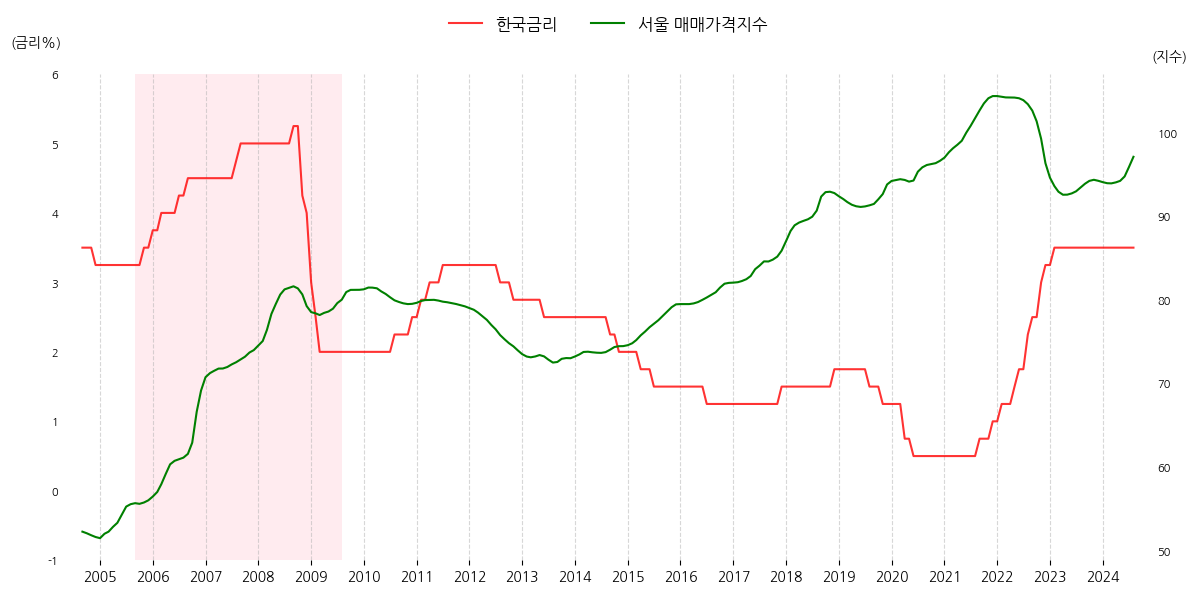

In [146]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
"""ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)"""

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2005-09-01', '2009-08-01', facecolor='pink', alpha=0.3) 

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_housing_price_bg0.png', dpi=200)
plt.show()


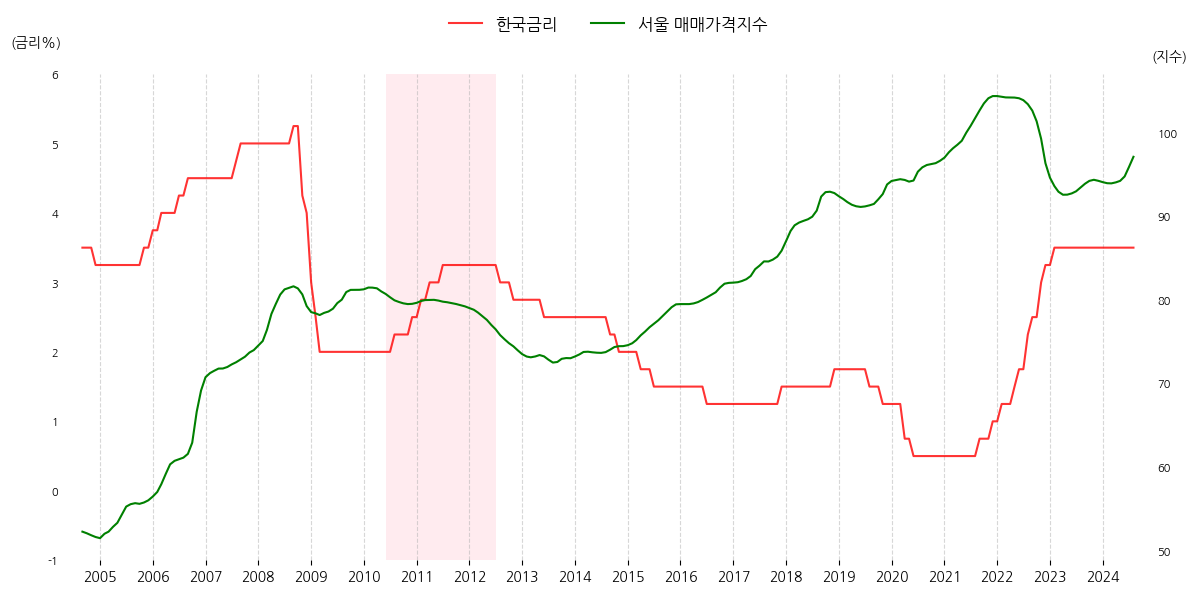

In [147]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
"""ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)"""

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2010-06-01', '2012-07-01', facecolor='pink', alpha=0.3) 

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_housing_price_bg0(2).png', dpi=200)
plt.show()


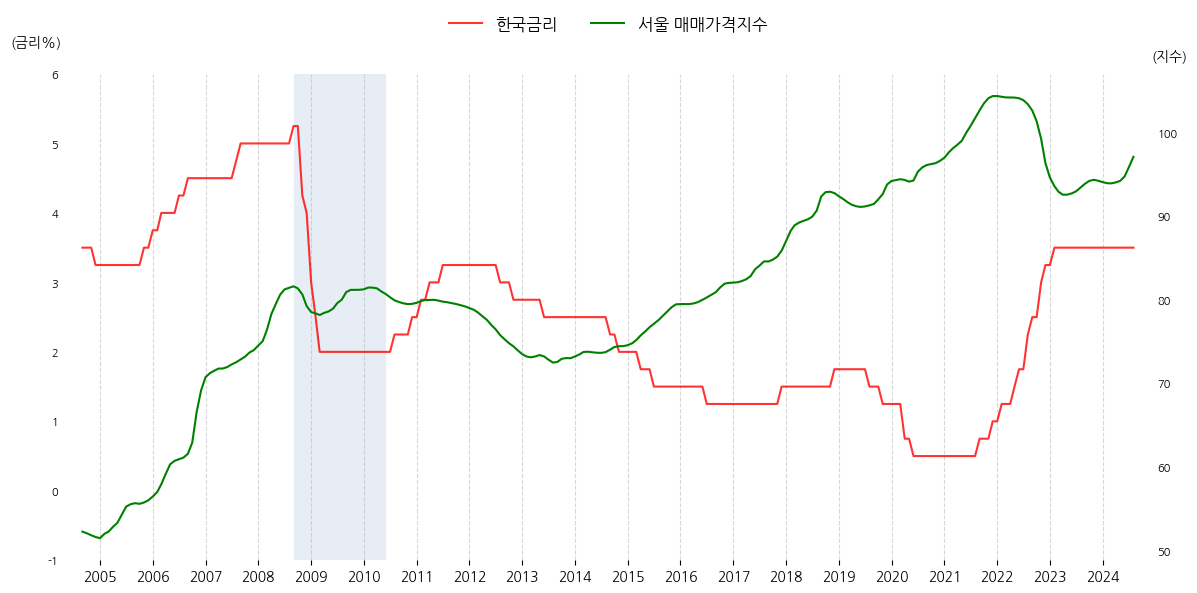

In [149]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
"""ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)"""

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2008-09-01', '2010-06-01', facecolor='lightsteelblue', alpha=0.3)    # 1기

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_housing_price_bg1.png', dpi=200)
plt.show()


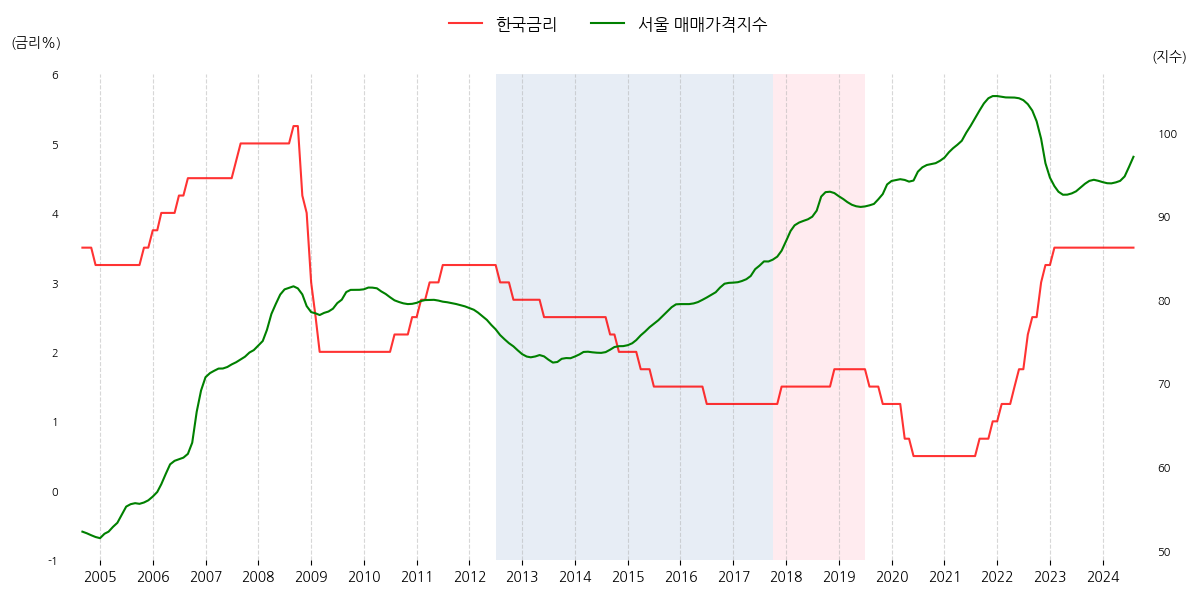

In [148]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
"""ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)"""

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
# 부분 배경색 설정
ax1.axvspan('2012-07-01', '2017-10-01', facecolor='lightsteelblue', alpha=0.3)
ax1.axvspan('2017-10-01','2019-07-01', facecolor='pink', alpha=0.3)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_housing_price_bg2(3).png', dpi=200)
plt.show()


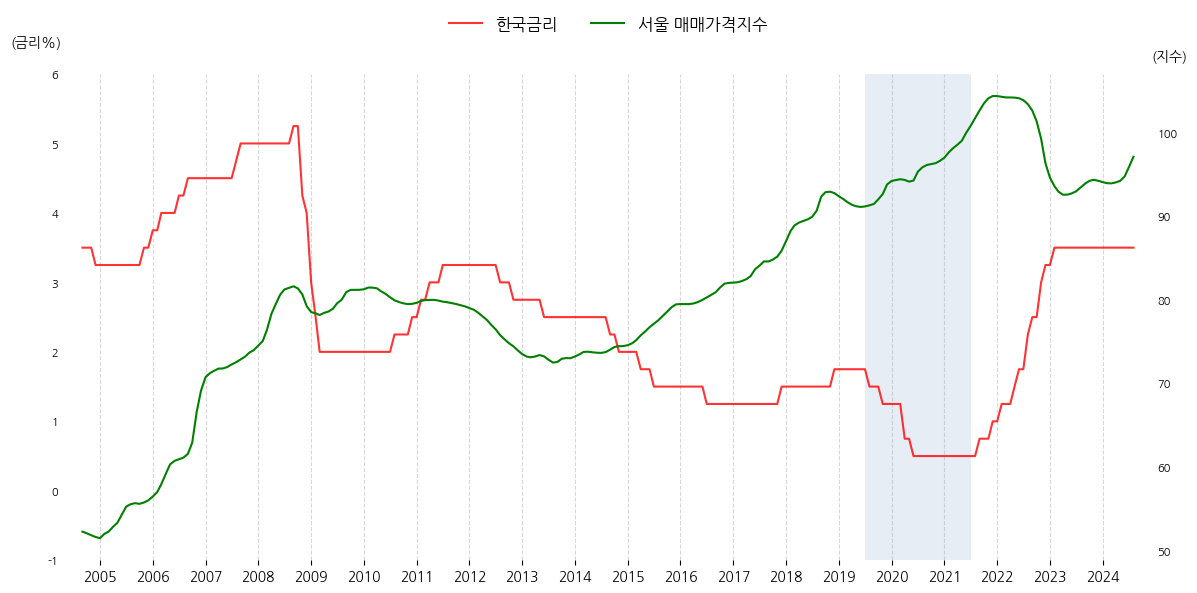

In [129]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
"""ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)"""

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
# 부분 배경색 설정
ax1.axvspan('2019-07-01', '2021-07-01', facecolor='lightsteelblue', alpha=0.3)    # 3기
# ax1.axvspan('2017-10-01','2019-07-01', facecolor='pink', alpha=0.3)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_housing_price_bg3.png', dpi=200)
plt.show()


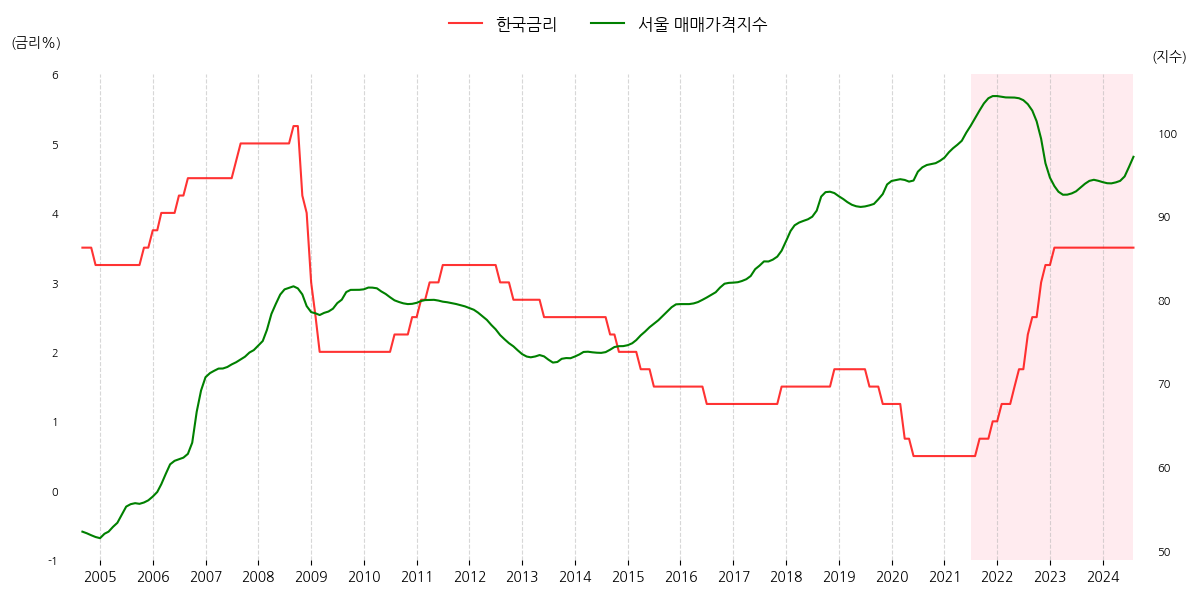

In [133]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(금리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
"""ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)"""

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_housing_price_index['seoul_housing_price_index'],
         color='g', label='서울 매매가격지수', alpha=1.0)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 6])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2021-07-01','2024-08-01', facecolor='pink', alpha=0.3)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_housing_price_bg4.png', dpi=200)
plt.show()


---

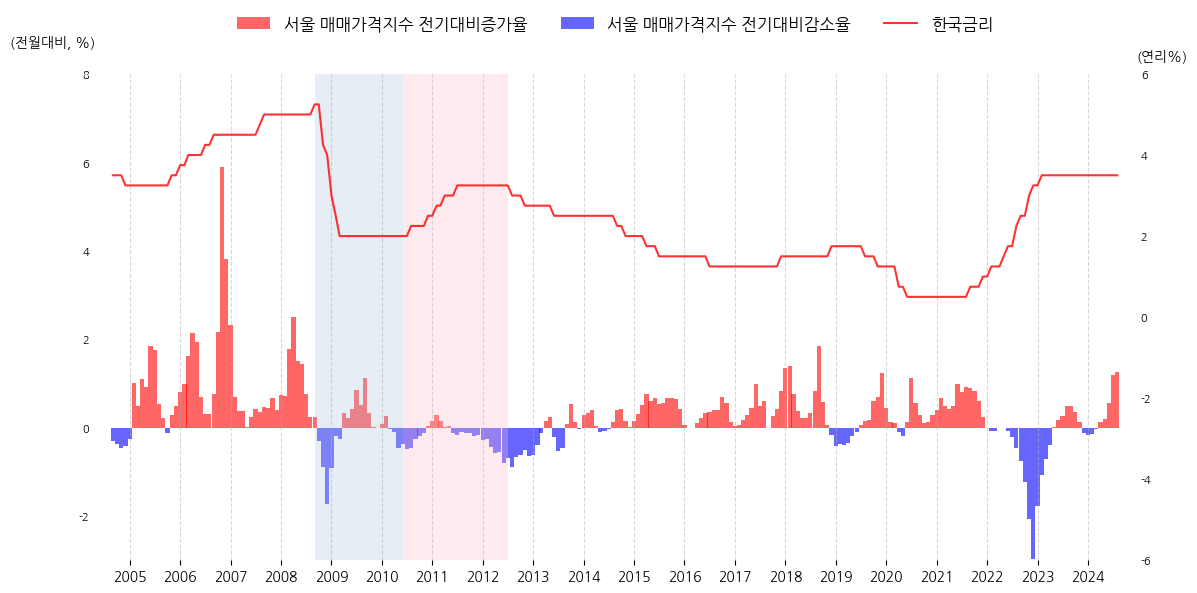

In [91]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(전월대비, %)', rotation=0)
ax1.yaxis.set_label_coords(-0.045, 1.05)
ax2.set_ylabel('(연리%)', rotation=0)
ax2.yaxis.set_label_coords(1.03, 1.05)

# 데이터 플로팅
seoul_rate_of_change_plus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] >= 0]

seoul_rate_of_change_minus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] < 0]

ax1.bar(seoul_rate_of_change_plus['date'], seoul_rate_of_change_plus['seoul_rate_of_change'],
        width=30.4,
        color='r', label='서울 매매가격지수 전기대비증가율', alpha=0.6)

ax1.bar(seoul_rate_of_change_minus['date'], seoul_rate_of_change_minus['seoul_rate_of_change'],
        width=30.4,
        color='b', label='서울 매매가격지수 전기대비감소율', alpha=0.6)

ax2.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-3, 8])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-6, 6])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2008-09-01', '2010-06-01', facecolor='lightsteelblue', alpha=0.3)    # 1기
ax1.axvspan('2010-06-01','2012-07-01', facecolor='pink', alpha=0.3)


# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_rate_of_chage(kor)_bg2.png', dpi=200)
plt.show()

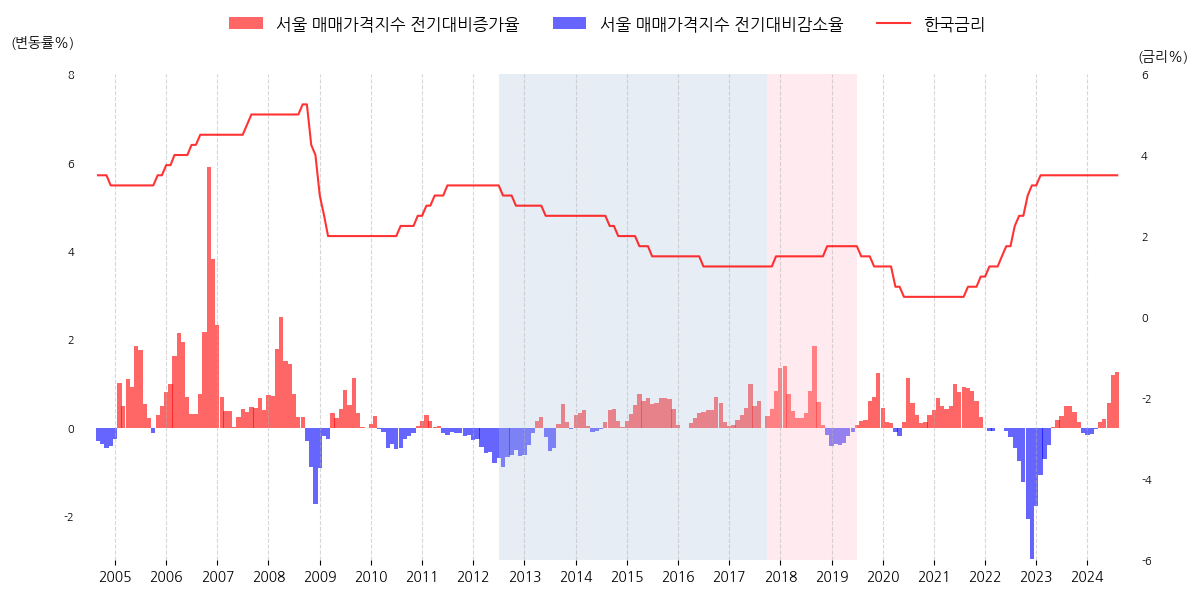

In [124]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(변동률%)', rotation=0)
ax1.yaxis.set_label_coords(-0.04, 1.05)
ax2.set_ylabel('(금리%)', rotation=0)
ax2.yaxis.set_label_coords(1.03, 1.05)

# 데이터 플로팅
seoul_rate_of_change_plus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] >= 0]

seoul_rate_of_change_minus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] < 0]

ax1.bar(seoul_rate_of_change_plus['date'], seoul_rate_of_change_plus['seoul_rate_of_change'],
        width=30.4,
        color='r', label='서울 매매가격지수 전기대비증가율', alpha=0.6)

ax1.bar(seoul_rate_of_change_minus['date'], seoul_rate_of_change_minus['seoul_rate_of_change'],
        width=30.4,
        color='b', label='서울 매매가격지수 전기대비감소율', alpha=0.6)

ax2.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-3, 8])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-6, 6])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2012-07-01', '2017-10-01', facecolor='lightsteelblue', alpha=0.3)
ax1.axvspan('2017-10-01','2019-07-01', facecolor='pink', alpha=0.3)


# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_rate_of_chage(kor)_bg2(1).png', dpi=200)
plt.show()


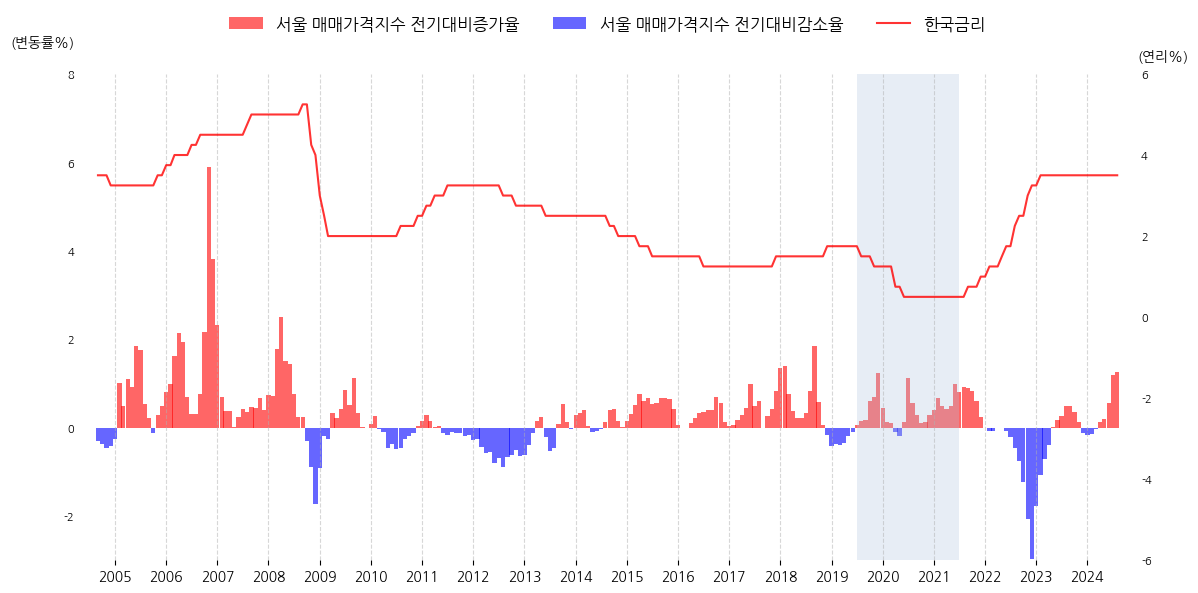

In [125]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']


# 축 레이블 설정
ax1.set_ylabel('(변동률%)', rotation=0)
ax1.yaxis.set_label_coords(-0.04, 1.05)
ax2.set_ylabel('(연리%)', rotation=0)
ax2.yaxis.set_label_coords(1.03, 1.05)

# 데이터 플로팅
seoul_rate_of_change_plus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] >= 0]

seoul_rate_of_change_minus = df_housing_price_index[df_housing_price_index['seoul_rate_of_change'] < 0]

ax1.bar(seoul_rate_of_change_plus['date'], seoul_rate_of_change_plus['seoul_rate_of_change'],
        width=30.4,
        color='r', label='서울 매매가격지수 전기대비증가율', alpha=0.6)

ax1.bar(seoul_rate_of_change_minus['date'], seoul_rate_of_change_minus['seoul_rate_of_change'],
        width=30.4,
        color='b', label='서울 매매가격지수 전기대비감소율', alpha=0.6)

ax2.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)


# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-3, 8])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-6, 6])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2019-07-01', '2021-07-01', facecolor='lightsteelblue', alpha=0.3)    # 3기
#ax1.axvspan('2017-10-01', '2019-07-01', facecolor='pink', alpha=0.3)

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

# 테두리 설정
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/seoul_rate_of_chage(kor)_bg3.png', dpi=200)
plt.show()


물가지수

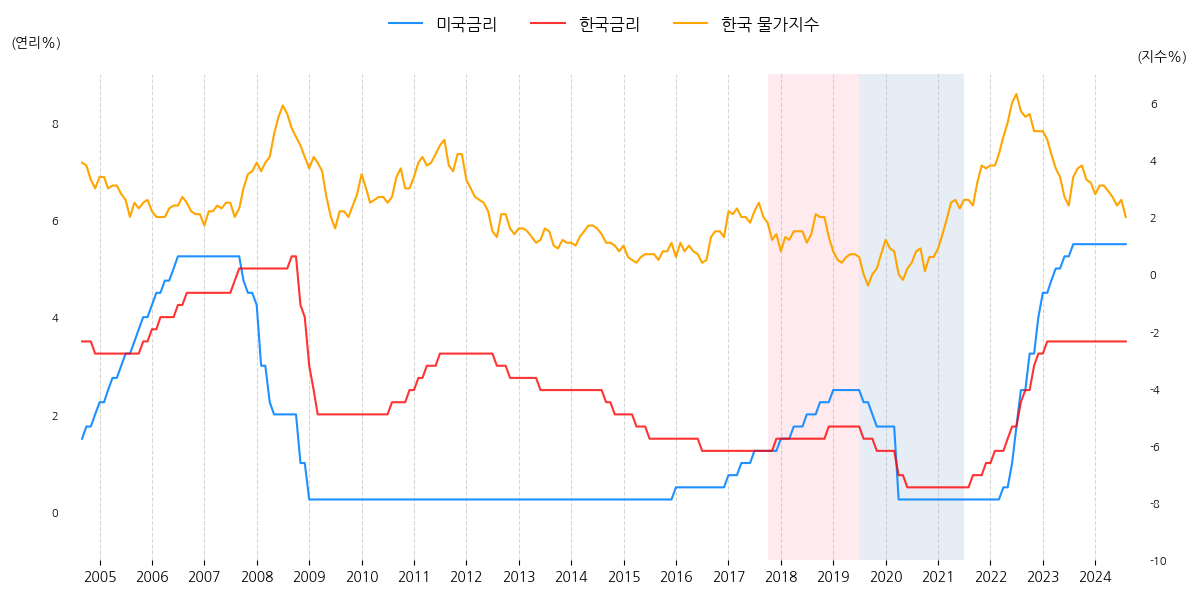

In [82]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']

# 축 레이블 설정
ax1.set_ylabel('(연리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수%)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_price_index['k_price_index'], 
         color='orange', label='한국 물가지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 9])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-10, 7])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2017-10-01', '2019-07-01', facecolor='pink', alpha=0.3)    # 2기
ax1.axvspan('2019-07-01', '2021-07-01', facecolor='lightsteelblue', alpha=0.3)    # 3기

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/price_index_bg3.png', dpi=200)
plt.show()


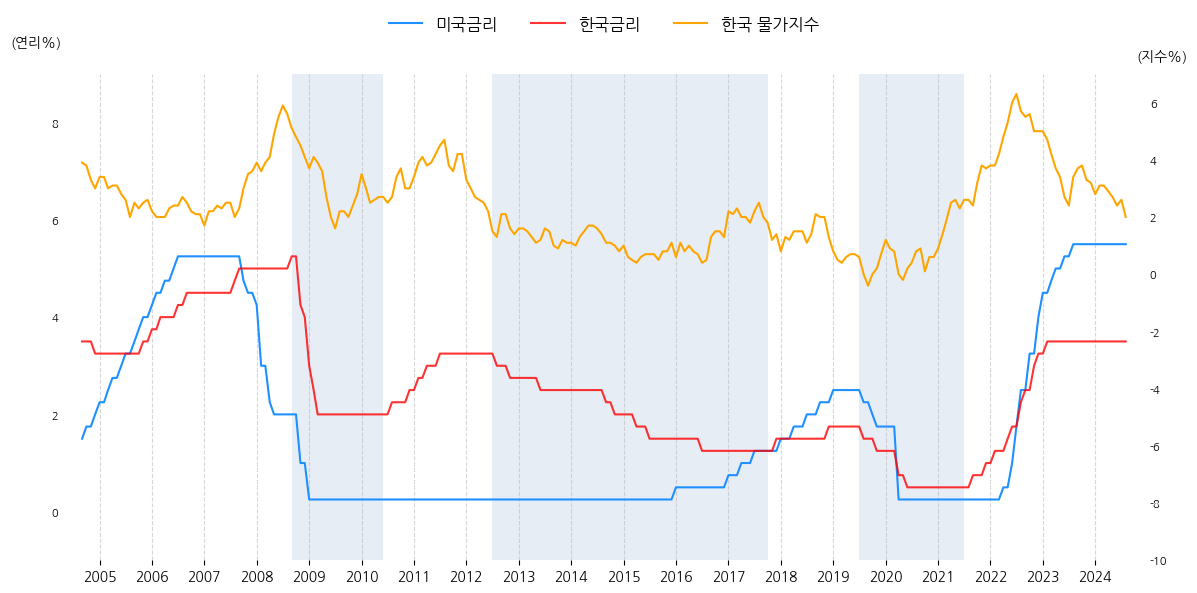

In [109]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']

# 축 레이블 설정
ax1.set_ylabel('(연리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수%)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_price_index['k_price_index'], 
         color='orange', label='한국 물가지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 9])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-10, 7])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2008-09-01', '2010-06-01', facecolor='lightsteelblue', alpha=0.3)    # 1기
ax1.axvspan('2012-07-01', '2017-10-01', facecolor='lightsteelblue', alpha=0.3)    # 2기
ax1.axvspan('2019-07-01', '2021-07-01', facecolor='lightsteelblue', alpha=0.3)    # 3기

# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/price_index_bg3.png', dpi=200)
plt.show()


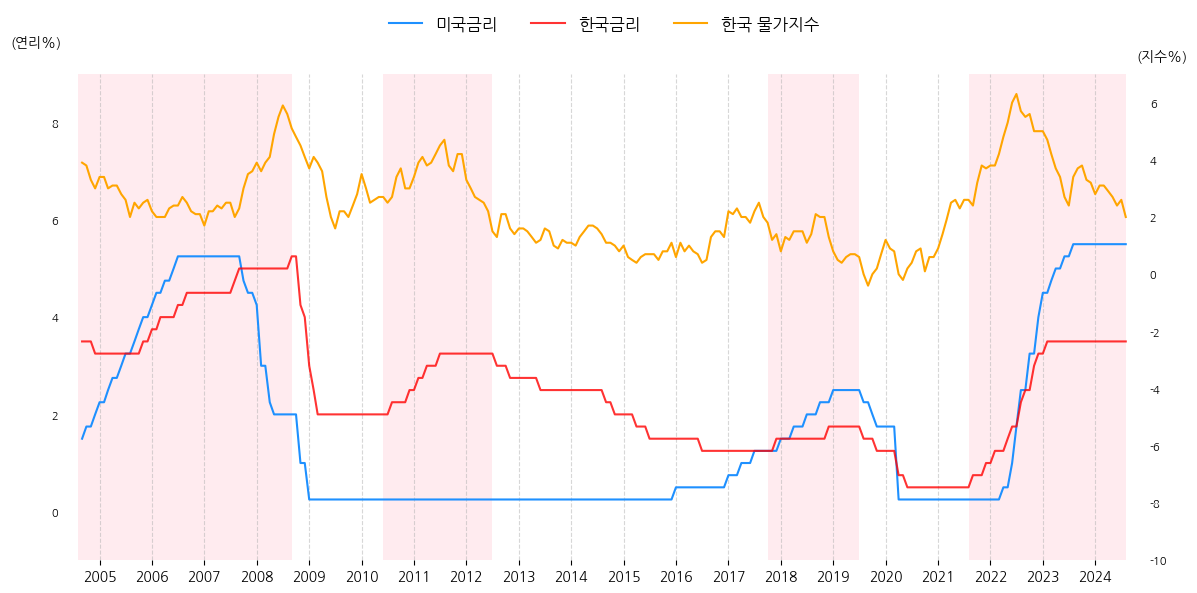

In [110]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax2 = ax1.twinx()
x = df_interest_rate['date']

# 축 레이블 설정
ax1.set_ylabel('(연리%)', rotation=0)
ax1.yaxis.set_label_coords(-0.03, 1.05)
ax2.set_ylabel('(지수%)', rotation=0)
ax2.yaxis.set_label_coords(1.02, 1.05)

# 데이터 플로팅
ax1.plot(x, df_interest_rate['usa_interest_rate'], 
         color='dodgerblue', label='미국금리', alpha=1.0)

ax1.plot(x, df_interest_rate['k_interest_rate'], 
         color='r', label='한국금리', alpha=0.8)

ax2.plot(x, df_price_index['k_price_index'], 
         color='orange', label='한국 물가지수', alpha=1.0)

# x축 포멧 설정
years = mdates.YearLocator()
dateFmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(years)    # 연도별로 틱 설정
ax1.xaxis.set_major_formatter(dateFmt)  # 연도 월 포멧 설정
ax1.tick_params(axis='x', rotation=0, labelsize=10)
ax1.tick_params(axis='y', left=False, labelsize=8)
ax2.tick_params(axis='y', right=False, labelsize=8)

# 축 범위 설정
ax1.set_ylim([-1, 9])
ax1.set_xlim(min(x) - timedelta(days=100), max(x) + timedelta(days=100))
ax2.set_ylim([-10, 7])

# 범례
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2,
           loc='upper center', bbox_to_anchor=(0.5, 1.15), ncols=4, frameon=False, fontsize=12)

# 부분 배경색 설정
ax1.axvspan('2004-08-01', '2008-09-01', facecolor='pink', alpha=0.3) 
ax1.axvspan('2010-06-01','2012-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2017-10-01', '2019-07-01', facecolor='pink', alpha=0.3)
ax1.axvspan('2021-08-01', '2024-08-01', facecolor='pink', alpha=0.3)


# 그리드 설정
ax1.grid(True, axis='x', linestyle='--', alpha=0.5)

ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('../data/pic/price_index_bg4.png', dpi=200)
plt.show()
